In [1]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("Country-data.csv")
data.head(10)
keterangan = pd.read_csv("data-dictionary.csv")
keterangan.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [3]:
country = data ["country"]
country.head(10)

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
5              Argentina
6                Armenia
7              Australia
8                Austria
9             Azerbaijan
Name: country, dtype: object

In [4]:
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [5]:
x = data.iloc[:,[1 , 3]].values
print(x)
y = data.iloc[:,[1 , 3]].values
print(y)

[[ 90.2    7.58]
 [ 16.6    6.55]
 [ 27.3    4.17]
 [119.     2.85]
 [ 10.3    6.03]
 [ 14.5    8.1 ]
 [ 18.1    4.4 ]
 [  4.8    8.73]
 [  4.3   11.  ]
 [ 39.2    5.88]
 [ 13.8    7.89]
 [  8.6    4.97]
 [ 49.4    3.52]
 [ 14.2    7.97]
 [  5.5    5.61]
 [  4.5   10.7 ]
 [ 18.8    5.2 ]
 [111.     4.1 ]
 [ 42.7    5.2 ]
 [ 46.6    4.84]
 [  6.9   11.1 ]
 [ 52.5    8.3 ]
 [ 19.8    9.01]
 [ 10.5    2.84]
 [ 10.8    6.87]
 [116.     6.74]
 [ 93.6   11.6 ]
 [ 44.4    5.68]
 [108.     5.13]
 [  5.6   11.3 ]
 [ 26.5    4.09]
 [149.     3.98]
 [150.     4.53]
 [  8.7    7.96]
 [ 15.7    5.07]
 [ 18.6    7.59]
 [ 88.2    4.51]
 [116.     7.91]
 [ 63.9    2.46]
 [ 10.2   10.9 ]
 [111.     5.3 ]
 [  5.5    7.76]
 [  3.6    5.97]
 [  3.4    7.88]
 [  4.1   11.4 ]
 [ 34.4    6.22]
 [ 25.1    8.06]
 [ 29.1    4.66]
 [ 19.2    6.91]
 [111.     4.48]
 [ 55.2    2.66]
 [  4.5    6.03]
 [ 24.1    4.86]
 [  3.     8.95]
 [  4.2   11.9 ]
 [ 63.7    3.5 ]
 [ 80.3    5.69]
 [ 16.5   10.1 ]
 [  4.2   11.6

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)


In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN (eps=5, min_samples=5)
y_cluster = dbscan.fit_predict(x)

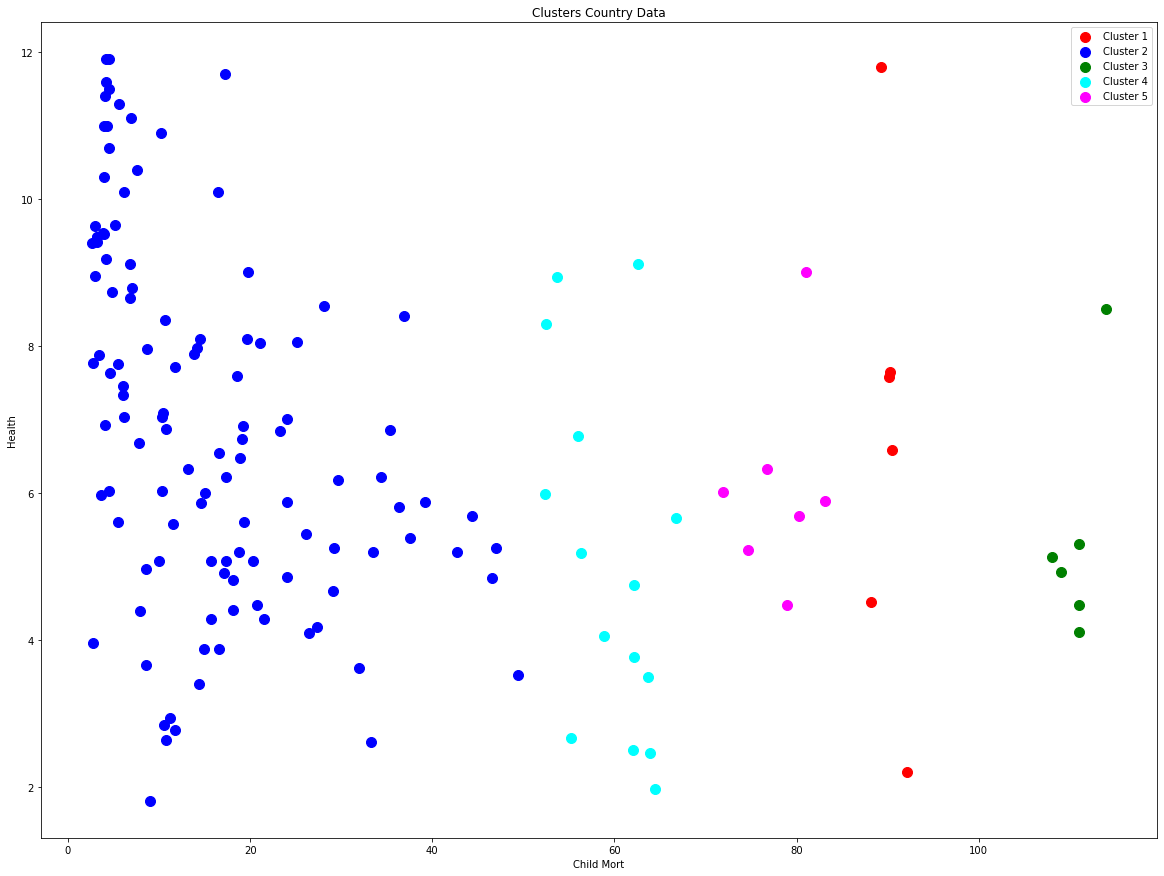

In [8]:
plt.figure(figsize=(20,15))
plt.scatter(x[y_cluster == 0,0], x[y_cluster == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_cluster == 1,0], x[y_cluster == 1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_cluster == 2,0], x[y_cluster == 2,1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_cluster == 3,0], x[y_cluster == 3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_cluster == 4,0], x[y_cluster == 4,1], s=100, c='magenta', label='Cluster 5')

plt.title('Clusters Country Data')
plt.xlabel('Child Mort')
plt.ylabel('Health')
plt.legend()
plt.show()


In [ ]:
dari visualisasi itu terlihat bahwa cluster 2 merupakan negara dengan kesehatan 
anak tertinggi dan kematian anak dibawah usia 5 tahun per 1000 kelahiran hidup,
terendah dibandingkan dengan cluster lainnya